# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**LINDAH, KELIDA**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np # for mathematical function
import pandas as pd # for data analysis and manipulation
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 

import datetime as dt

import warnings
warnings.filterwarnings('ignore')

# Libraries for data preparation and model building
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor 


# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

##### Let us have a look at the data for Spain Electricity Shortfall given.

In [2]:
#load the data
df_train = pd.read_csv('df_train.csv', index_col = 0)
df_test = pd.read_csv('df_test.csv',index_col = 0)

#to have a copy of our dataframes
df_test_copy = df_test.copy()
df_train_copy =df_train.copy()
df_train.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


The Dataframe's pd.read_csv method isfor loading data from text files. df_train.head() gives us an overview of the first five rows of the dataframe. We get to see the column names and the values within the columns
NB: load_shortfall_3h is our target/label variable




##### We also want to know how many records we have in the dataframe

In [3]:
print('train: ', df_train.shape)

print('test: ', df_test.shape)

train:  (8763, 48)
test:  (2920, 47)


Our train dataset has 8763 rows and 48 columns(the target variable inclusive) while our test set has 2920 rows with 47 columns. Here the test set has features for predicting our target variable




##### Now that we have an overviewof how our data looks like, we can go ahead and perform some Exploratory Data Analysis

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


##### We will check for null values, column value counts and  different datatypes of columns of our data frame using the info method

In [4]:
#check null value

df_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

A most of our columns are of Float64 data type, with the exception of time, Valencia_wind_deg and Seville_pressure.
Valencia_wind_deg and Seville_pressure are categorical hence the object dtype while time should be in datetime format.

Even with this information, notice that Valencia_pressure is the only column with missing values


##### We will set our time variable as datetime and our object variables as category so as to have the correct format of our data types

In [5]:
df_test['time'] = pd.to_datetime(df_test['time'])

#have a copy of our test_data with the correct dtype for our time column
df_test_copy = df_test.copy()

In [6]:
df_train['time'] = pd.to_datetime(df_train['time'])

#have a copy of our train_data with the correct dtype for our time column
df_train_copy = df_train.copy()

In [7]:
for col in ['Valencia_wind_deg', 'Seville_pressure']:
    df_train[col] = df_train[col].astype('category')

#have a copy of our train_data with the correct  dtype for our categorical columns
df_train_copy = df_train.copy()


In [8]:
for col in ['Valencia_wind_deg', 'Seville_pressure']:
    df_test[col] = df_test[col].astype('category')
    

#have a copy of our train_data with the correct  dtype for our categorical columns
df_test_copy = df_test.copy()

... It was necessary to perform the above for making it easy to further explore our data well

##### We are ready to start our exploratory data analysis of the data.
We will start by examining the five number summary statistics. We can use the dataframe's describe method to generate these for the numeric features as well as the load_shortfall_3h label column.

In [9]:
# look at data statistics
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02
Barcelona_wind_speed,8763.0,2.870497,1.792197,0.000000,1.666667,2.666667,4.000000,1.266667e+01


The statistics reveal some important information about the distribution of the data in each of the numeric fields, including the number of observations (there are 8763 records except for Valencia_pressure), the mean, standard deviation, minimum and maximum values, and the quartile values . From this, we can see that the mean number of load_shortfall_3h is around 10673 with a very high std; The minimum values of all numerical columns are greater than or equal to zero except for the target column. this shows that predictive variables accept positive values.



##### we check the for skewness (how symmetrical our features are)


In [10]:
df_train.skew()

Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_max        0.082672
Valencia_temp 

Features greater than 1 are highly positively skewed eg Valencia_snow_3h; features less than -1 are highly negativiley skewed eg Seville_weather_id we also have feautures that are moderately skewed to the left and to the right and which are fairly symmetrical eg Bilbao_temp(-0.5<x<0.5 are fairly symmetrical)

##### Kurtosis is the measure of outliers present in the data. High kurtosis (>3) indicates a large number of outliers and low kurtosis (<3) a lack of outliers.

In [11]:
df_train.kurtosis()

Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0.515989
Madrid_pressure            2

Some of our features have very large number of outliers with Valencia_snow_3h taking the lead

##### We might get a clearer idea of the distribution of load_shortfall_3h values by visualizing the data. 

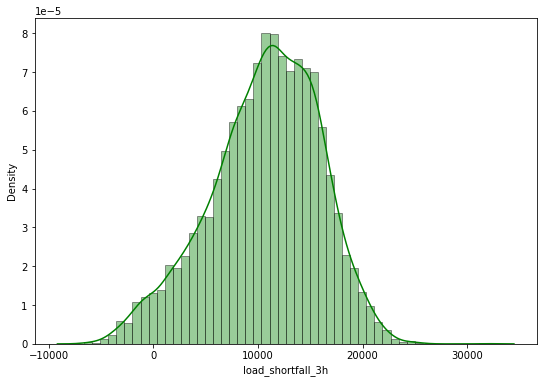

In [12]:
# Get the label column
label = df_train['load_shortfall_3h']

fig = plt.figure(figsize=(9, 6))
# plotting histogram and density
# plot for carat using distplot()
sns.distplot(a=df_train['load_shortfall_3h'], color='green',
             hist_kws={"edgecolor": 'black'})
 
# visualizing plot using matplotlib.pyplot library
plt.show()


It looks like our target variable is fairly normally distributed...

...We can also use a box plot to check if  the above has outliers

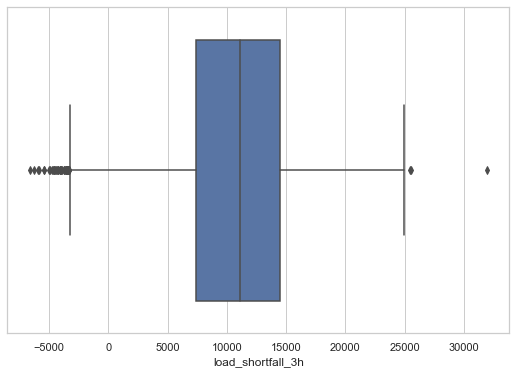

In [13]:
# Plot the boxplot  
fig = plt.figure(figsize=(9, 6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_train["load_shortfall_3h"])

The few values above this are shown in the box plot as small circles, indicating that they are outliers - in other words, unusually high or low values beyond the typical range of most of the data.

We can also have a look at the distribution of load_shortfall throughout the period as a time series

Text(0, 0.5, 'load_shortfall_3h')

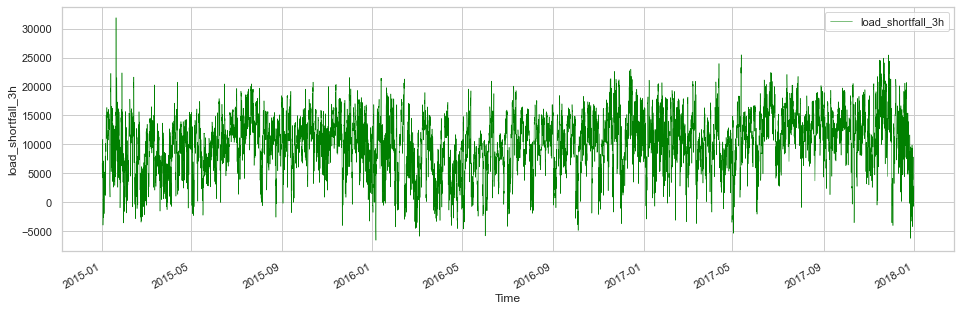

In [14]:
# Draw a scatter plot
fig = plt.rcParams['figure.figsize']=(16, 5)
df_train.plot("time", "load_shortfall_3h", color='green', linewidth = 0.5,
         markerfacecolor='blue', markersize=12)
plt.xlabel('Time')
plt.ylabel('load_shortfall_3h')

There is a trend of load_shortfall_3h during different seasons of the year. Like at the beginning of the year we have negative values of load_shortfall_3h

##### Let us compare the categorical features to the label. We'll do this by creating box plots that show the distribution of load_shortfall_3h counts for each category.

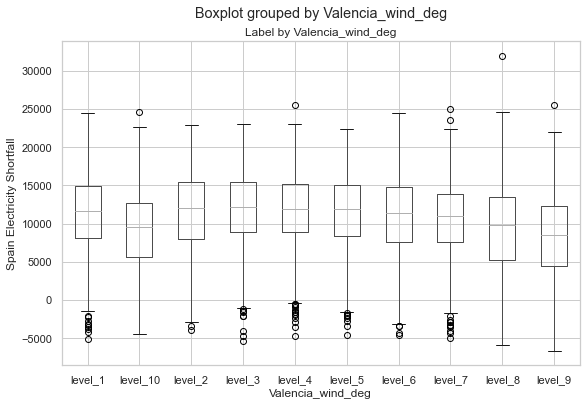

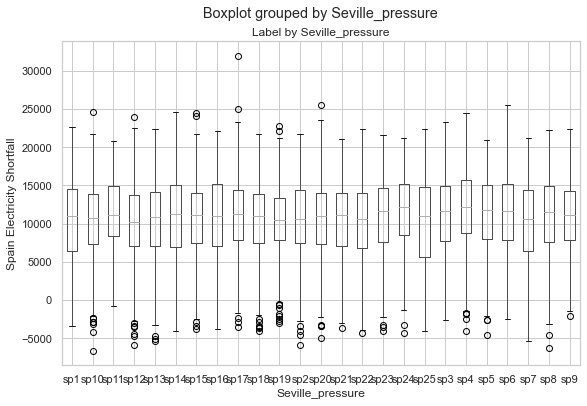

In [15]:
# plot relevant feature interactions
for col in ['Valencia_wind_deg', 'Seville_pressure']:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df_train.boxplot(column = 'load_shortfall_3h', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Spain Electricity Shortfall")
plt.show()

The plots show some little to no variance in the relationship between some category values and load_shortfall_3h. However, load_shortfall is prone to outliers in most of the categories.

##### Having seen how the categorical features relate with the target variable, we will now plot relevant feature interactions

In [16]:
# have a look at feature distributions
corrmat = df_train.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'load_shortfall_3h')['load_shortfall_3h'].index

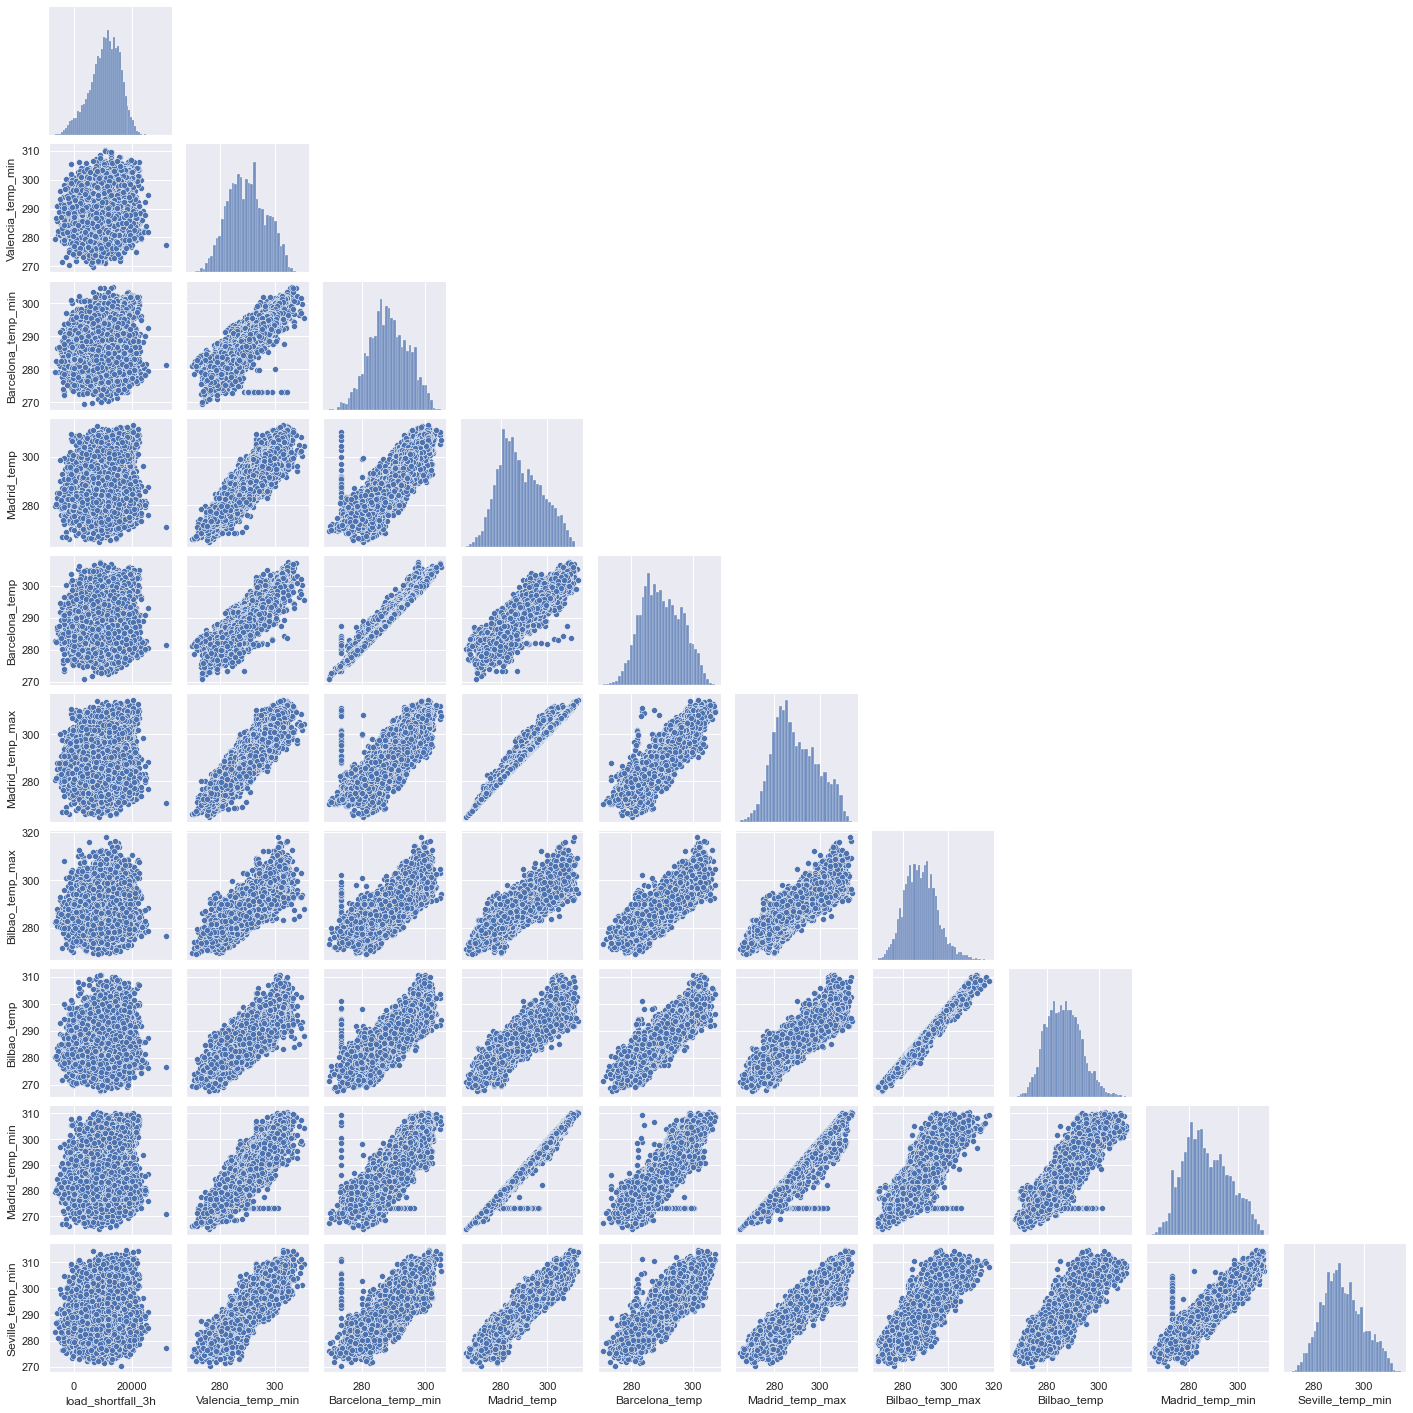

In [17]:
sns.set()
sns.pairplot(df_train[cols], size = 2, corner =True)
plt.show();

Most of the feature distribution is fairly normally distributed with the exception of Madrid_tem, min and max which is slightly skewed to the right. Relationships between features is linear hence they are positively corelated

We can also achieve the correlation using a heat map and see the values of their correlations

Text(0.5, 1.0, 'Correlation Heatmap')

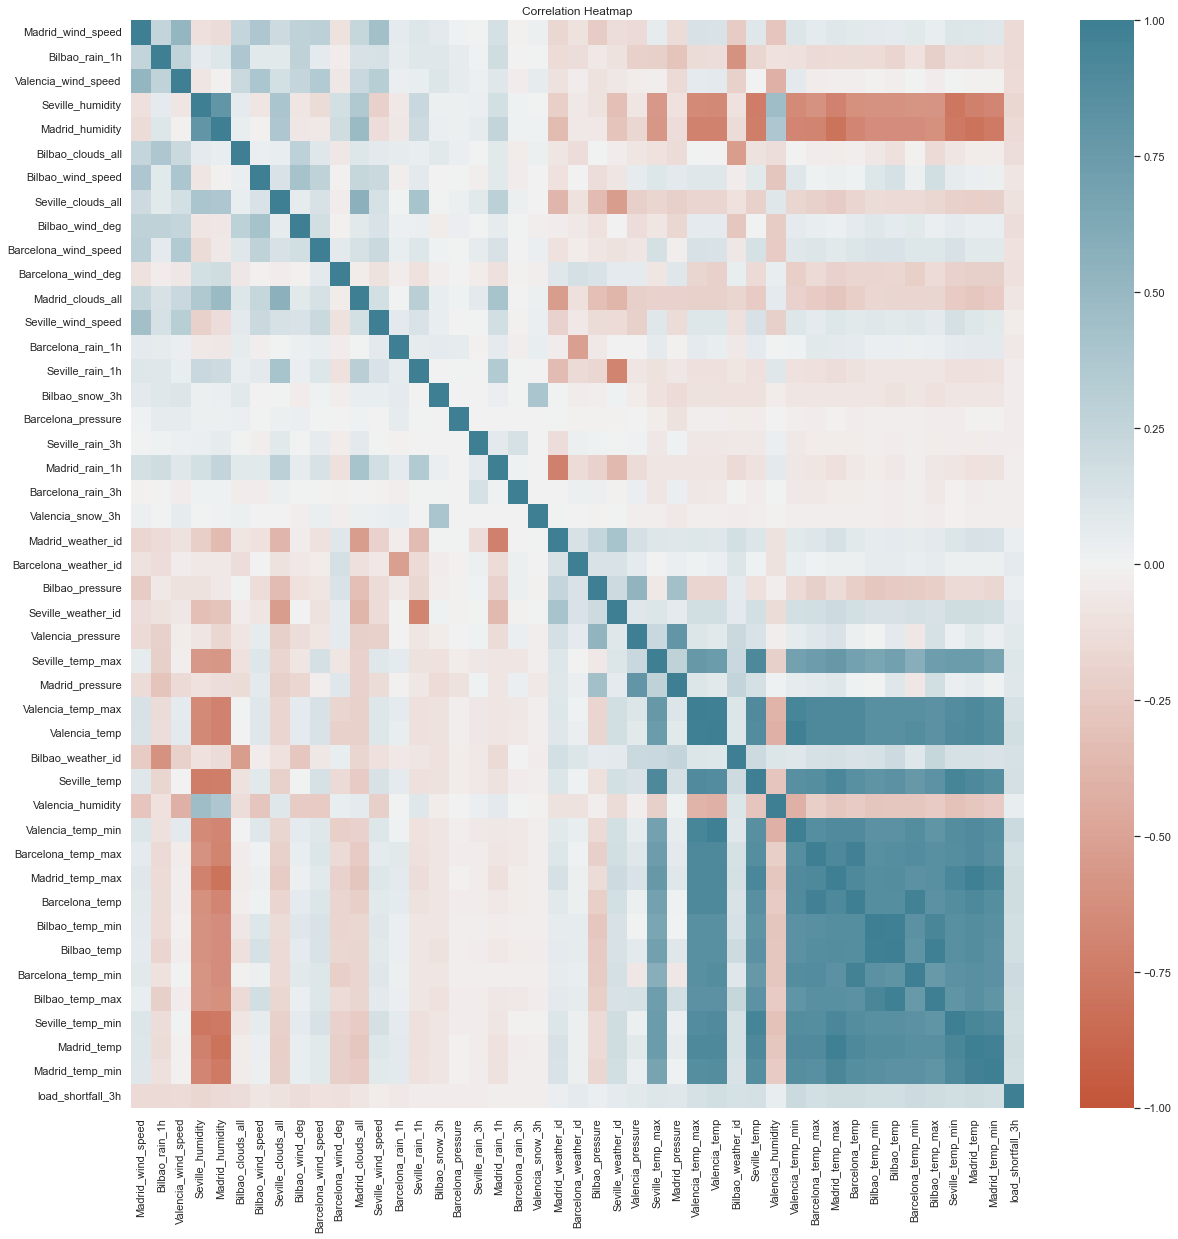

In [18]:
fig, ax = plt.subplots(figsize = (20,20))
heatmap = sns.heatmap(df_train.corr(),ax=ax, vmin=-1, vmax=1, annot=False,cmap=sns.diverging_palette(20, 220, n=200),)
heatmap.set_title("Correlation Heatmap", fontdict = {"fontsize":12})

Towards the bottom left of our heatmap whe have features which are positively correlated and note that during training the model we will have to drop some of them Notice also humidity and temeprature features are negatively correlated, temperature features are positively correlated.

#### After understanding our features, their realtionships, their datatypes we can now go ahead and perform some feature engineering

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [19]:
#This command will provide the total number of null values appearing in each feature.
#check null value
df_train.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

Valencia_pressure has 2068 missing values that need to be imputed



##### We are going to impute the missing values with mean as one of the methods of filling missing values

In [20]:
# remove missing values/ features
print('mean: ', df_train.Valencia_pressure.mean())
print('mean: ', df_test.Valencia_pressure.mean())


mean:  1012.0514065222828
mean:  1013.1483509056495


In [21]:
#fill missing values for the test set
mean_value = df_test.Valencia_pressure.mean()  
df_test.Valencia_pressure.fillna(value=mean_value, inplace=True)
df_test.isnull().sum()
df_test_copy = df_test.copy()

In [22]:
#fill missing values for the train set
mean_value = df_train.Valencia_pressure.mean()  
df_train.Valencia_pressure.fillna(value=mean_value, inplace=True)
df_train.isnull().sum()

time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_

.... our data is now filled, i.e. no missing values

##### We are done with filling in missing values, and now we look at our categorical columns which are in string format.  Machine learning models works best with numerical data. Therefore we are going to endcode our categories so that they are in numeric

How many unique values do we hve for the two columns?

In [23]:
print('Sum of unique object:', {df_train.Valencia_wind_deg.value_counts().count()})
print(df_train.Valencia_wind_deg.unique())

print('Sum of unique object:', {df_train.Seville_pressure.value_counts().count()})
print(df_train.Seville_pressure.unique())


Sum of unique object: {10}
['level_5', 'level_10', 'level_9', 'level_8', 'level_7', 'level_6', 'level_4', 'level_3', 'level_1', 'level_2']
Categories (10, object): ['level_1', 'level_10', 'level_2', 'level_3', ..., 'level_6', 'level_7', 'level_8', 'level_9']
Sum of unique object: {25}
['sp25', 'sp23', 'sp24', 'sp21', 'sp16', ..., 'sp10', 'sp7', 'sp3', 'sp2', 'sp1']
Length: 25
Categories (25, object): ['sp1', 'sp10', 'sp11', 'sp12', ..., 'sp6', 'sp7', 'sp8', 'sp9']


...Unique categories in Valencia_wind_deg are 10 while for Seville_pressure are 25


##### The pandas method called get_dummies gets in handy for this process. The text data are categorical variables, and get_dummies will transform all the categorical text data into numbers by adding a column for each distinct category.

In [24]:
df_test_dummies = pd.get_dummies(df_test, columns=["Valencia_wind_deg", "Seville_pressure"])

# a copy of test data that has the cat features as num  
df_test_copy = df_test_dummies.copy()
                                                

In [25]:
df_train_dummies = pd.get_dummies(df_train, columns=["Valencia_wind_deg", "Seville_pressure"])
df_train_dummies.head()

,time,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,2015-01-01 03:00:00,0.666667,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,0,0,1,0,0,0,0,0,0,0
1,2015-01-01 06:00:00,0.333333,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,0,0,1,0,0,0,0,0,0,0
2,2015-01-01 09:00:00,1.000000,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,0,0,1,0,0,0,0,0,0,0
3,2015-01-01 12:00:00,1.000000,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,0,0,1,0,0,0,0,0,0,0
4,2015-01-01 15:00:00,1.000000,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,0,0,1,0,0,0,0,0,0,0


We reorder our columns so that our dependent variable is the last column of the dataframe. This will make a heatmap visualisation representing a correlation matrix of our data easier to interpret.

In [26]:
column_titles = [col for col in df_train_dummies.columns if col!= 'load_shortfall_3h'] + ['load_shortfall_3h']
df_train_dummies=df_train_dummies.reindex(columns=column_titles)




Next we split our time column into year, month, week, day , hour  as a way of expanding our features for training our models

In [27]:
# create new features

# year
df_train_dummies['Year'] = df_train_dummies['time'].dt.year

# month
df_train_dummies['Month'] = df_train_dummies['time'].dt.month

# day
df_train_dummies['Day'] = df_train_dummies['time'].dt.day

# Dayofweek
df_train_dummies['Day_of_week'] = df_train_dummies['time'].dt.weekday

# hour
df_train_dummies['Start_hour'] = df_train_dummies['time'].dt.hour

# hour
#df_train['Hour_of_week'] = data_df['time'].dt.dayofweek * 24 + (df['time'].dt.hour + 1)




# Drop Feature
df_train_dummies.drop(['time'] , axis=1 , inplace=True)


In [28]:
# create new features

# year
df_test_dummies['Year'] = df_test_dummies['time'].dt.year

# month
df_test_dummies['Month'] = df_test_dummies['time'].dt.month

# day
df_test_dummies['Day'] = df_test_dummies['time'].dt.day

# Dayofweek
df_test_dummies['Day_of_week'] = df_test_dummies['time'].dt.weekday

# hour
df_test_dummies['Start_hour'] = df_test_dummies['time'].dt.hour

# hour
#df_train['Hour_of_week'] = data_df['time'].dt.dayofweek * 24 + (df['time'].dt.hour + 1)

df_test_dummies.drop(['time'] , axis=1 , inplace=True)


In [29]:
df_train_dummies.shape

(8763, 85)

Previously we had 48 columns in our original set but now we have 85 columns given the dummy variable encoding and splitting our date time

##### ...... We can now look at the correlation matrix

In [30]:
df_train_dummies.corr()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9,load_shortfall_3h,Year,Month,Day,Day_of_week,Start_hour
Madrid_wind_speed,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,...,0.035207,0.012197,0.012842,-0.005568,-0.150981,-0.031553,-0.237445,-0.029954,-4.042128e-04,1.862275e-01
Bilbao_rain_1h,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,...,-0.021876,-0.026230,-0.013346,-0.010522,-0.152510,-0.200747,-0.188274,0.072752,3.232531e-02,5.452669e-02
Valencia_wind_speed,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,...,-0.006408,-0.005885,-0.000902,-0.001530,-0.142791,-0.012650,-0.237156,-0.000340,1.896518e-02,2.041029e-01
Seville_humidity,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,...,-0.072023,-0.049795,-0.062759,-0.042192,-0.167290,-0.045730,-0.111622,0.032979,8.265003e-03,-4.249821e-01
Madrid_humidity,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,...,-0.103408,-0.061511,-0.094460,-0.053552,-0.150536,-0.084456,-0.076567,0.047372,4.108225e-03,-3.078718e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year,-0.031553,-0.200747,-0.012650,-0.045730,-0.084456,-0.031658,0.082611,-0.089657,-0.104647,-0.188756,...,0.027625,0.026966,0.041181,-0.008904,0.131324,1.000000,-0.001039,-0.001044,1.677021e-03,2.748198e-04
Month,-0.237445,-0.188274,-0.237156,-0.111622,-0.076567,-0.117452,-0.086698,-0.170345,-0.174941,-0.122221,...,0.016328,0.011313,0.012210,0.017350,0.199048,-0.001039,1.000000,0.008826,1.458431e-04,3.013643e-04
Day,-0.029954,0.072752,-0.000340,0.032979,0.047372,0.025688,-0.008020,0.010582,0.034253,-0.009699,...,0.010907,-0.018296,-0.003005,0.001411,0.092116,-0.001044,0.008826,1.000000,-2.721985e-03,2.849199e-04
Day_of_week,-0.000404,0.032325,0.018965,0.008265,0.004108,0.038342,-0.009543,0.017713,0.007095,-0.006528,...,-0.001148,-0.008983,-0.013202,0.000797,-0.156510,0.001677,0.000146,-0.002722,1.000000e+00,6.141191e-07


Text(0.5, 1.0, 'Correlation Heatmap')

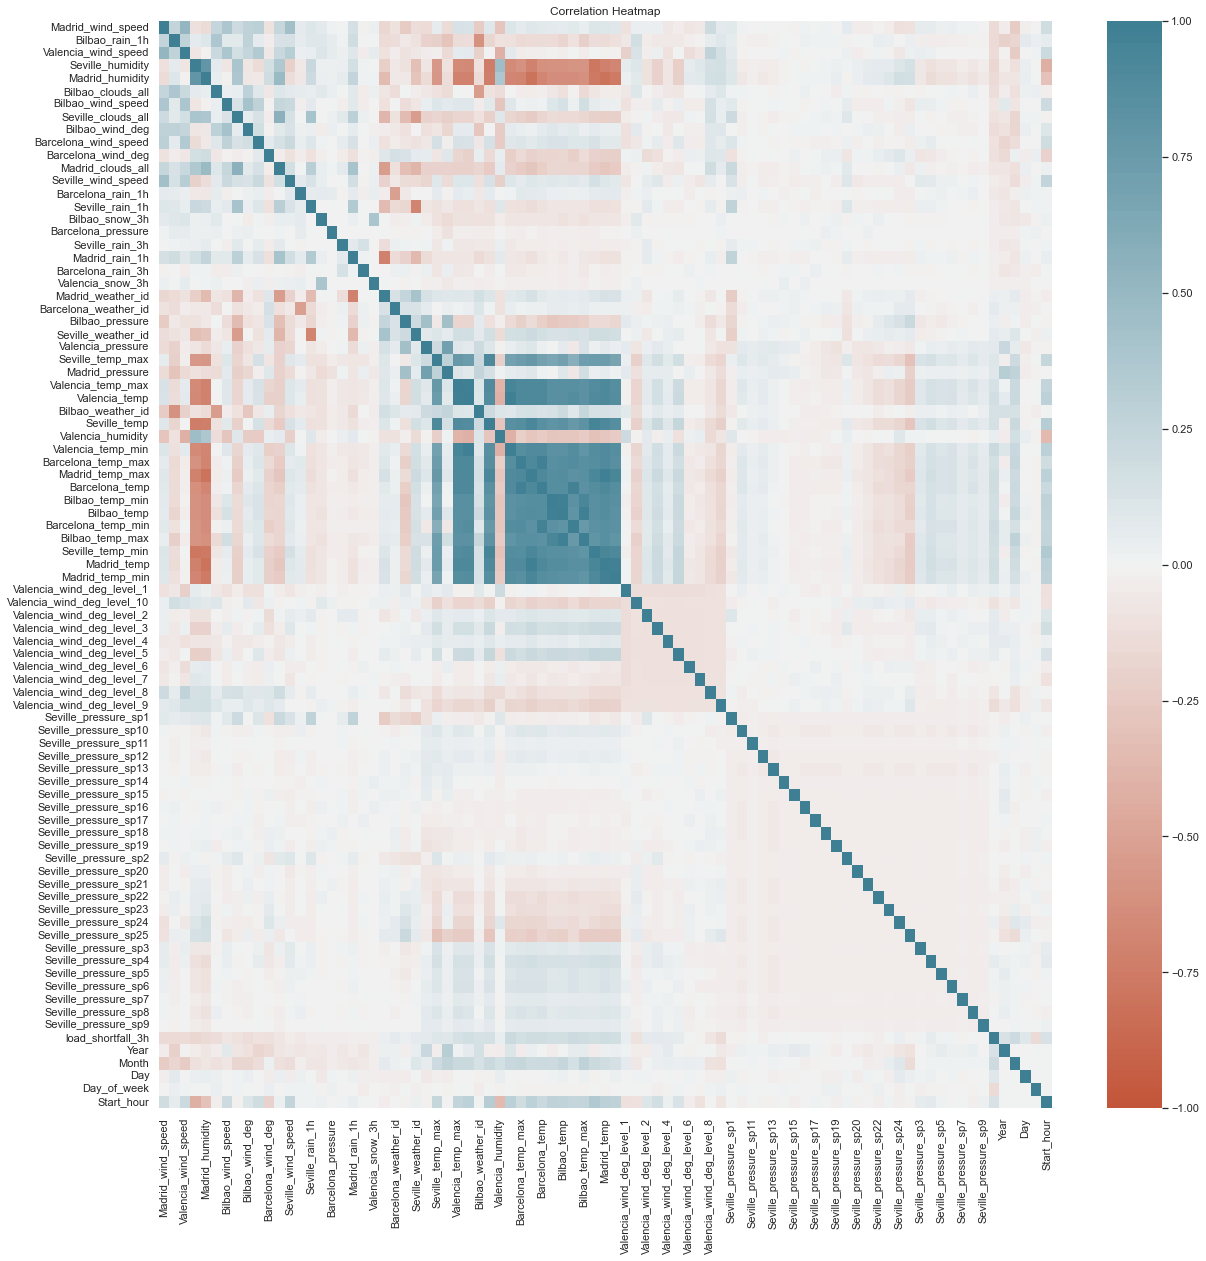

In [31]:
fig, ax = plt.subplots(figsize = (20,20))
heatmap = sns.heatmap(df_train_dummies.corr(),ax=ax, vmin=-1, vmax=1, annot=False,cmap=sns.diverging_palette(20, 220, n=200),)
heatmap.set_title("Correlation Heatmap", fontdict = {"fontsize":12})

from the correlation matrix and the correlatio heatmap we can see that there is multicolinearity. for instance, madrid_humidity and seville_humidity have a strong positive correlation. This means we will have to select some variables to use in our model to avoid working with redundant information

Is our data ready for training an ML model.... Not yet,
We need to get all the features on the same scale.

##### Previously we saw that some of our features had vast outliers. Standardisation to the rescue--since it handles outliers gracefully.

In [32]:
# remain with the predictors
df_train_features = df_train_dummies.drop(['load_shortfall_3h'] , axis=1).columns

In [33]:
# import scaler method from sklearn

#Scale the dataset
scaler = StandardScaler()
#fit the scaller to the values
df_train_scaled_features = scaler.fit_transform(df_train_dummies.drop(['load_shortfall_3h'] , axis=1).values)


In [34]:
#fit the standardscaler to our test
df_test_scaled_features = scaler.fit_transform(df_test_dummies.values)

In [35]:
#fit the standardscaler to our train
df_test_scaled = pd.DataFrame(df_test_scaled_features, index=df_test_dummies.index, columns=df_train_features)

Our values have been scaled. We just need them as a dataframe

In [36]:
#convert to a dataframe
df_train_scaled = pd.DataFrame(df_train_scaled_features, index=df_train_dummies.index, columns=df_train_features)
df_train_scaled


,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9,Year,Month,Day,Day_of_week,Start_hour
0,-0.950708,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,...,-0.210555,-0.221833,-0.142332,-0.223808,-0.146043,-1.226179,-1.602429,-1.675368,-0.002740,-1.090901
1,-1.130863,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,...,-0.210555,-0.221833,-0.142332,-0.223808,-0.146043,-1.226179,-1.602429,-1.675368,-0.002740,-0.654451
2,-0.770554,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,...,-0.210555,-0.221833,-0.142332,-0.223808,-0.146043,-1.226179,-1.602429,-1.675368,-0.002740,-0.218001
3,-0.770554,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,...,-0.210555,-0.221833,-0.142332,-0.223808,-0.146043,-1.226179,-1.602429,-1.675368,-0.002740,0.218449
4,-0.770554,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,0.816272,...,-0.210555,-0.221833,-0.142332,-0.223808,-0.146043,-1.226179,-1.602429,-1.675368,-0.002740,0.654899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,-0.770554,-0.362123,0.033344,1.164513,1.571954,0.405464,1.464200,2.731037,0.663487,-0.671745,...,-0.210555,-0.221833,-0.142332,-0.223808,-0.146043,1.224780,1.588031,1.734435,1.497951,-0.218001
8759,1.391298,-0.362123,-0.243160,0.855051,1.133610,-0.516218,3.626416,2.525030,0.598160,0.072263,...,-0.210555,-0.221833,-0.142332,-0.223808,-0.146043,1.224780,1.588031,1.734435,1.497951,0.218449
8760,2.111916,0.704887,1.968875,0.221392,0.558284,0.610283,3.822981,0.808311,1.218768,1.374278,...,-0.210555,-0.221833,-0.142332,-0.223808,-0.146043,1.224780,1.588031,1.734435,1.497951,0.654899
8761,2.652379,0.171382,1.968875,0.221392,0.887042,0.610283,0.481375,1.563667,0.598160,1.374278,...,-0.210555,-0.221833,-0.142332,-0.223808,-0.146043,1.224780,1.588031,1.734435,1.497951,1.091349


...All values are now on the same scale. We are ready to train our regression model

#### We will split our data into training and testing, select best features for a regression then train using different models to ,evaluate our test set using mse as a metric for accuracy to get the best performing model.

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---


We will split our data into the training set and testing set

In [37]:
# create targets and features dataset
# split data


# Split data 80%-20% into training set and test set
X = df_train_scaled
y = df_train_dummies['load_shortfall_3h']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 7010 rows
Test Set: 1753 rows


Splitting our data in 80% for training we use 7010 rows and  1753 for testing

Not all features are relevant for training. Various techniques for feature selections are provided so here we will use Correlation Feature Selection.-a measure of how two variables change together.

##### The scikit-learn machine library provides an implementation of the correlation statistic in the f_regression() function. This function can be used as a feature selection strategy, such as selecting the top k most relevant features (largest values) via the SelectKBest class.

In [38]:
# configure to select all features
best_features = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
best_features.fit(X_train, y_train)
# transform train input data
X_train_best_features = best_features.transform(X_train)
# transform test input data
X_test_best_features = best_features.transform(X_test)


##### We can then print the scores for each variable (largest is better) and plot the scores for each variable as a bar graph to get an idea of how many features we should select.

Feature 0: 158.416129
Feature 1: 151.060339
Feature 2: 140.309977
Feature 3: 198.684435
Feature 4: 174.215730
Feature 5: 115.970322
Feature 6: 48.443343
Feature 7: 63.650172
Feature 8: 90.137591
Feature 9: 86.068724
Feature 10: 108.451156
Feature 11: 56.192981
Feature 12: 17.334378
Feature 13: 21.031491
Feature 14: 4.725022
Feature 15: 7.805253
Feature 16: 9.058386
Feature 17: 10.242518
Feature 18: 5.780872
Feature 19: 3.875008
Feature 20: 4.130948
Feature 21: 8.787345
Feature 22: 22.108672
Feature 23: 12.120913
Feature 24: 24.515719
Feature 25: 33.064826
Feature 26: 86.044244
Feature 27: 59.884522
Feature 28: 145.843325
Feature 29: 214.342611
Feature 30: 138.964249
Feature 31: 184.621815
Feature 32: 14.203726
Feature 33: 295.840206
Feature 34: 196.127983
Feature 35: 242.457271
Feature 36: 244.638883
Feature 37: 212.886122
Feature 38: 223.277180
Feature 39: 285.125943
Feature 40: 236.257402
Feature 41: 222.784836
Feature 42: 256.825845
Feature 43: 230.736558
Feature 44: 14.541695
Featu

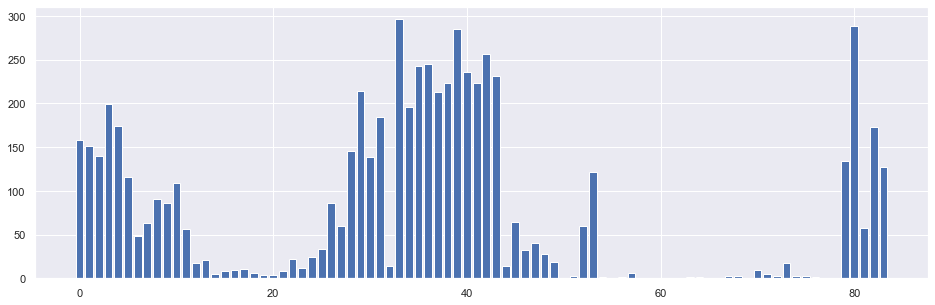

In [39]:
    
for i in range(len(best_features.scores_)):
    print('Feature %d: %f' % (i, best_features.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(best_features.scores_))], best_features.scores_)
plt.show()

Based on the f_regression function around 30 features are reliable for our model therefore we could set k = 30 when configuring the SelectKBest to select these top features. First, we specify the random forest instance, indicating the number of trees.
Then we use selectFromModel object from sklearn to automatically select the features.

In [40]:
#from sklearn.feature_selection import RFE
#from sklearn.ensemble import RandomForestRegressor 

r_selection = RFE(RandomForestRegressor(n_estimators=100 , random_state=0 , n_jobs=1), n_features_to_select=30)


In [41]:
r_selection.fit(X_train , y_train)

RFE(estimator=RandomForestRegressor(n_jobs=1, random_state=0),
    n_features_to_select=50)

To see which features are important we can use get_support method on the fitted model.
It will return an array of boolean values. True for the features whose importance is greater than the mean importance and False for the rest.

In [42]:
r_selection.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False,  True, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True])

...We can now make a list and count the selected features.

In [43]:
#Best Selected features
best_train_features = X_train.columns[(r_selection.get_support())]
len(best_train_features)

50

30 features have been selected by the random forest, wil use them for our model

In [44]:
print(best_train_features)

Index(['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all',
       'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg',
       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all',
       'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
       'Madrid_temp', 'Madrid_temp_min', 'Valencia_wind_deg_level_6',
       'Valencia_wind_deg_level_8', 'Valencia_wind

In [45]:
#Estimators
r_selection.estimator_.feature_importances_

array([0.03041452, 0.00254871, 0.01903678, 0.01312238, 0.01536959,
       0.00892482, 0.01680393, 0.00692814, 0.01659325, 0.01138038,
       0.01701215, 0.00737912, 0.00991433, 0.00385276, 0.00108405,
       0.0315259 , 0.00192408, 0.00130014, 0.00665583, 0.008055  ,
       0.02578647, 0.00594248, 0.0119061 , 0.01472687, 0.01608465,
       0.00813067, 0.00517052, 0.00923163, 0.00851265, 0.02301312,
       0.01377498, 0.00780034, 0.00766895, 0.00846779, 0.01182855,
       0.00948058, 0.01936049, 0.01052474, 0.01016478, 0.00728776,
       0.00814767, 0.00103718, 0.00119092, 0.00104567, 0.00098331,
       0.05021865, 0.09038757, 0.18594209, 0.07086208, 0.12549487])

In [46]:
best_features = ['Madrid_wind_speed', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_wind_speed', 'Bilbao_wind_deg',
       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Seville_wind_speed',
       'Barcelona_pressure', 'Bilbao_pressure', 'Valencia_pressure',
       'Seville_temp_max', 'Madrid_pressure', 'Valencia_temp_max',
       'Bilbao_weather_id', 'Valencia_humidity', 'Valencia_temp_min',
       'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
       'Madrid_temp_min', 'Year', 'Month', 'Day', 'Day_of_week', 'Start_hour']

In [47]:
#work with the best features
X = df_train_scaled[best_features]
X.columns

Index(['Madrid_wind_speed', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_wind_speed', 'Bilbao_wind_deg',
       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Seville_wind_speed',
       'Barcelona_pressure', 'Bilbao_pressure', 'Valencia_pressure',
       'Seville_temp_max', 'Madrid_pressure', 'Valencia_temp_max',
       'Bilbao_weather_id', 'Valencia_humidity', 'Valencia_temp_min',
       'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
       'Madrid_temp_min', 'Year', 'Month', 'Day', 'Day_of_week', 'Start_hour'],
      dtype='object')

In [48]:
#for the test data work with the best features
X = df_test_scaled[best_features]
X.columns

Index(['Madrid_wind_speed', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_wind_speed', 'Bilbao_wind_deg',
       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Seville_wind_speed',
       'Barcelona_pressure', 'Bilbao_pressure', 'Valencia_pressure',
       'Seville_temp_max', 'Madrid_pressure', 'Valencia_temp_max',
       'Bilbao_weather_id', 'Valencia_humidity', 'Valencia_temp_min',
       'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
       'Madrid_temp_min', 'Year', 'Month', 'Day', 'Day_of_week', 'Start_hour'],
      dtype='object')

##### Our first model is LinearRegression, we are ready to train the model using the best features

In [49]:
# create one or more ML models
# Train the model

from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
lr_model = LinearRegression().fit(X_train[best_features], y_train)
print (lr_model)

LinearRegression()


we have fit our x values into  the model and below we make a prediction for our y values

In [50]:
y_predictions = lr_model.predict(X_test[best_features])
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(y_predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [11490. 11476. 12062.  9824. 14528.  7964. 13243.  9367.  6399. 10605.]
Actual labels   :  1226    11450.666667
7903    13693.333333
1559    18337.333333
3621    -1221.000000
7552     8515.000000
1467     9394.666667
5488    19553.333333
222      7263.666667
3317     4115.000000
3127    15493.000000
Name: load_shortfall_3h, dtype: float64


#####  plot a regression line to see how well the model performs

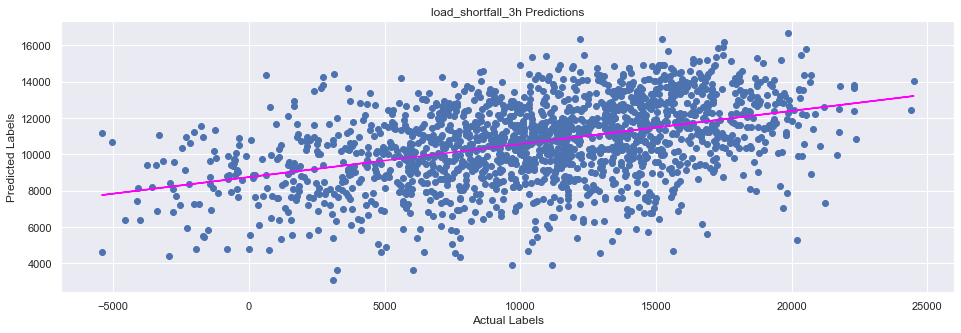

In [51]:
# evaluate one or more ML models
plt.scatter(y_test, y_predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('load_shortfall_3h Predictions')
# overlay the regression line
z = np.polyfit(y_test, y_predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

#####  Evaluate the metrics for our model 

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_predictions)
print("R2:", r2)

MSE: 22853884.30573656
RMSE: 4780.573637727648
R2: 0.1885105912790449


Lasso() 

MSE: 22854405.90347445
RMSE: 4780.628191302316
R2: 0.18849207053070083


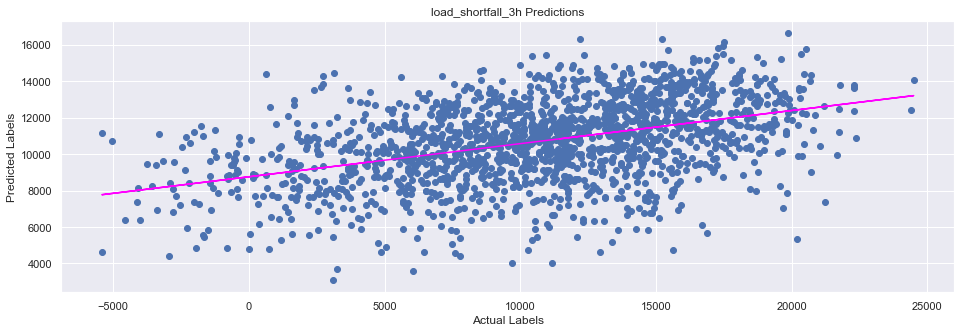

In [53]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
lasso_model = Lasso().fit(X_train[best_features], y_train)
print (lasso_model, "\n")

# Evaluate the model using the test data
y_predictions = lasso_model.predict(X_test[best_features])
mse = mean_squared_error(y_test, y_predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, y_predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, y_predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('load_shortfall_3h Predictions')
# overlay the regression line
z = np.polyfit(y_test, y_predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
dtr_model = DecisionTreeRegressor().fit(X_train[best_features], y_train)
print (dtr_model, "\n")

# Visualize the model tree
tree = export_text(dtr_model)
print(tree)

DecisionTreeRegressor() 

|--- feature_27 <= -1.16
|   |--- feature_27 <= -1.50
|   |   |--- feature_29 <= 0.00
|   |   |   |--- feature_29 <= -1.31
|   |   |   |   |--- feature_5 <= 1.42
|   |   |   |   |   |--- feature_3 <= 1.17
|   |   |   |   |   |   |--- feature_22 <= 0.78
|   |   |   |   |   |   |   |--- feature_16 <= 0.32
|   |   |   |   |   |   |   |   |--- feature_2 <= 0.53
|   |   |   |   |   |   |   |   |   |--- feature_21 <= 0.63
|   |   |   |   |   |   |   |   |   |   |--- feature_11 <= 0.86
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- feature_11 >  0.86
|   |   |   |   |   |   |   |   |   |   |   |--- value: [9761.00]
|   |   |   |   |   |   |   |   |   |--- feature_21 >  0.63
|   |   |   |   |   |   |   |   |   |   |--- feature_20 <= 0.45
|   |   |   |   |   |   |   |   |   |   |   |--- value: [15236.33]
|   |   |   |   |   |   |   |   |   |   |--- feature_20 >  0.45
|   |   |   |   |   |   |   

MSE: 14346447.381211592
RMSE: 3787.6704425294965
R2: 0.49059031073753057


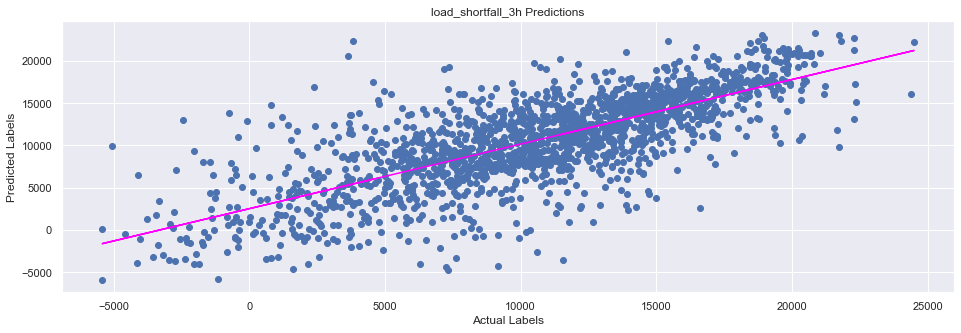

In [55]:
# Evaluate the model using the test data
y_predictions = dtr_model.predict(X_test[best_features])
mse = mean_squared_error(y_test, y_predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, y_predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, y_predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('load_shortfall_3h Predictions')
# overlay the regression line
z = np.polyfit(y_test, y_predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

RandomForestRegressor() 

MSE: 7821170.035985649
RMSE: 2796.6354850043735
R2: 0.7222880555838408


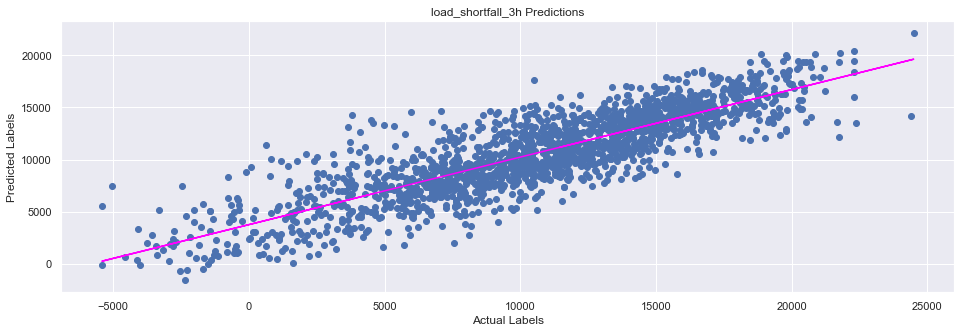

In [56]:
from sklearn.ensemble import RandomForestRegressor
import pickle
# Train the model
rfr_model = RandomForestRegressor().fit(X_train[best_features], y_train)
print (rfr_model, "\n")

# Evaluate the model using the test data
y_predictions = rfr_model.predict(X_test[best_features])
mse = mean_squared_error(y_test, y_predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, y_predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, y_predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('load_shortfall_3h Predictions')
# overlay the regression line
z = np.polyfit(y_test, y_predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

#model_save_path = "rfr_model.pkl"
#with open(model_save_path,'wb') as file:
  #  pickle.dump(model,file)

GradientBoostingRegressor() 

MSE: 10817732.105974246
RMSE: 3289.032092572866
R2: 0.6158869576418025


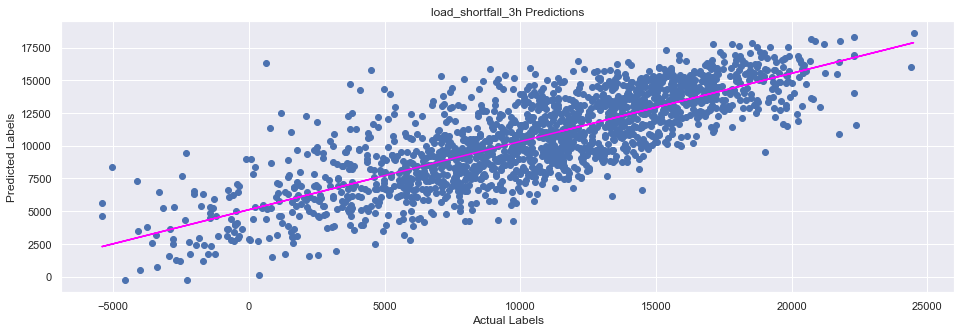

In [57]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
gbr_model = GradientBoostingRegressor().fit(X_train[best_features], y_train)
print (gbr_model, "\n")

# Evaluate the model using the test data
y_predictions = gbr_model.predict(X_test[best_features])
mse = mean_squared_error(y_test, y_predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, y_predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, y_predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('load_shortfall_3h Predictions')
# overlay the regression line
z = np.polyfit(y_test, y_predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 150} 

GradientBoostingRegressor(n_estimators=150) 

MSE: 9864304.724793477
RMSE: 3140.7490706507383
R2: 0.649740993632461


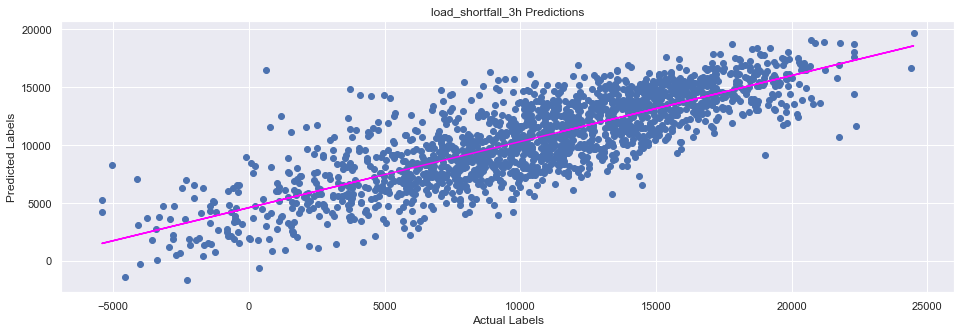

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train[best_features], y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
gsc_model=gridsearch.best_estimator_
print(gsc_model, "\n")

# Evaluate the model using the test data
y_predictions = gsc_model.predict(X_test[best_features])
mse = mean_squared_error(y_test, y_predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, y_predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, y_predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('load_shortfall_3h Predictions')
# overlay the regression line
z = np.polyfit(y_test, y_predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [59]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
pipline_model = pipeline.fit(X_train, (y_train))
print (pipline_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


MSE: 26258205.31574466
RMSE: 5124.276077237121
R2: 0.06763090157070228


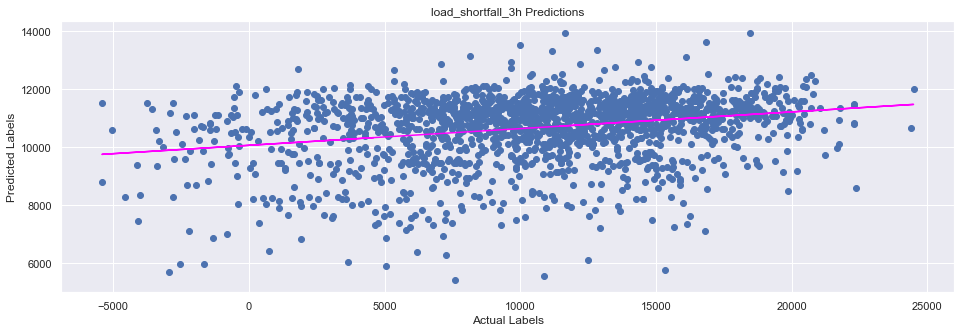

In [60]:
# Get predictions
y_predictions = pipline_model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, y_predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, y_predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, y_predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('load_shortfall_3h Predictions')
z = np.polyfit(y_test, y_predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [61]:
#saving the best perfoeming models

model_rfr_save_path = "rfr_model.pkl"
with open(model_rfr_save_path,'wb') as file:
    pickle.dump(rfr_model,file)

In [62]:
model_rfr_load_path = "rfr_model.pkl"
with open(model_rfr_load_path,'rb') as file:
    unpickled_rfr_model = pickle.load(file)

In [63]:
y_pred =  unpickled_rfr_model.predict(X)

In [64]:
df_new = pd.DataFrame(y_pred, columns=['load_shortfall_3h'])

In [65]:
df_test_copy.head()

,time,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
8763,2018-01-01 00:00:00,5.000000,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,...,0,0,1,0,0,0,0,0,0,0
8764,2018-01-01 03:00:00,4.666667,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,...,0,0,1,0,0,0,0,0,0,0
8765,2018-01-01 06:00:00,2.333333,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,...,0,0,1,0,0,0,0,0,0,0
8766,2018-01-01 09:00:00,2.666667,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,...,0,0,1,0,0,0,0,0,0,0
8767,2018-01-01 12:00:00,4.000000,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,...,0,0,1,0,0,0,0,0,0,0


In [66]:
output_rfr_df = pd.DataFrame({"time": df_test_copy['time'].reset_index(drop=True)})

In [67]:
rfr_model_file = output_df.join(df_new)

NameError: name 'output_df' is not defined

In [ ]:
rfr_model_file['load_shortfall_3h'] = df_new.values

In [ ]:
rfr_model_file.to_csv("rfr_model_file.csv", index=False)

In [ ]:
print(rfr_model_file)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic